In [13]:
# Import necessary libraries

# For the seam carving algorithm
import cv2 # type: ignore
import numpy as np
import matplotlib.pyplot as plt

#For the entropy energy map
from skimage.filters import rank
from skimage.morphology import disk

# For the HoG energy map
from skimage.feature import hog
from skimage.color   import rgb2gray

# To use the Numba JIT compiler
from numba import njit

# To use joblib for parallel processing
from joblib import Parallel, delayed

# Load the image
image_ref = cv2.imread('broadway_original.webp')
girls_image = cv2.imread('dataset-20110512/girls/girls.png')
bike_image= cv2.imread('dataset-20110512/bike/bike.png')
house_image = cv2.imread('dataset-20110512/house/house.png')


from class_SeamCarver import SeamCarver

In [14]:
# 1) Create a SeamCarver object
sc = SeamCarver(house_image)

# 2) Define the number of seams to remove
num_seams = 100

# 3) Perform seam carving
carved_image = sc.upsize(num_seams, method='l1',orientation=1) # 0 for vertical seams, 1 for horizontal seams

# 4) Display the original and carved images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(house_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(carved_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Carved Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Original Image Shape:", house_image.shape)
print("Carved Image Shape:", carved_image.shape)

ValueError: could not broadcast input array from shape (64,3) into shape (63,3)

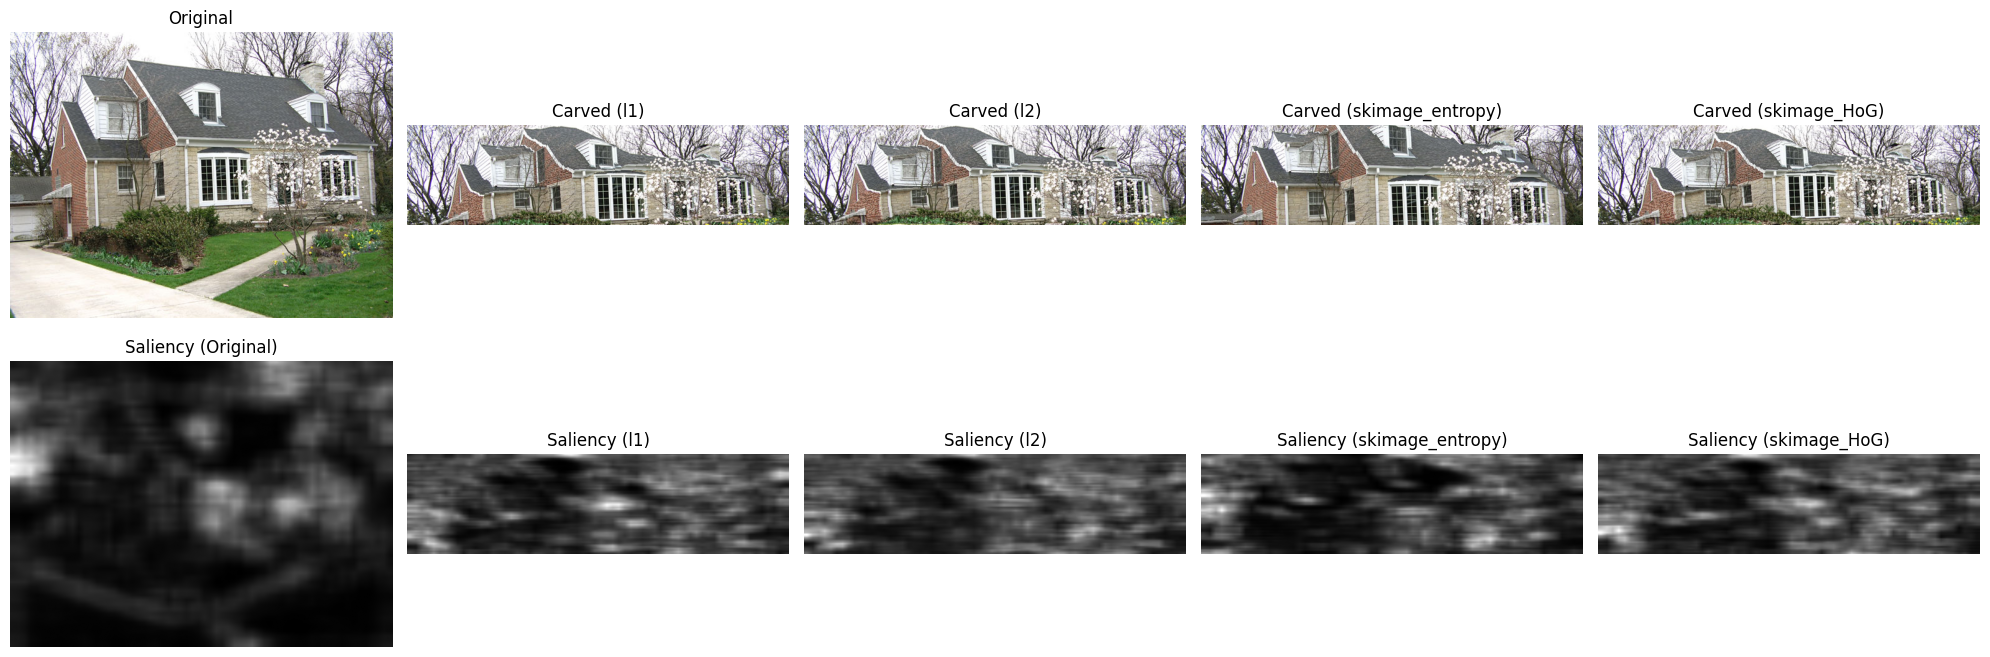

In [4]:
# Compare seam carving results using different energy methods on house_image

energy_methods = ['l1', 'l2', 'skimage_entropy', 'skimage_HoG']
carved_images = []
num_seams = 300

for method in energy_methods:
    sc = SeamCarver(house_image)
    carved_img = sc.seam_carve(num_seams, method=method, orientation=1)
    carved_images.append((method, carved_img))

plt.figure(figsize=(4 * (len(energy_methods) + 1), 8))

# Affichage de l'image originale
plt.subplot(2, len(energy_methods) + 1, 1)
plt.imshow(cv2.cvtColor(house_image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Calcul et affichage de la carte de saillance de l'image originale
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(house_image)
saliencyMap = (saliencyMap * 255).astype("uint8")
plt.subplot(2, len(energy_methods) + 1, len(energy_methods) + 2)
plt.imshow(saliencyMap, cmap='gray')
plt.title('Saliency (Original)')
plt.axis('off')

# Affichage des images réduites et de leur carte de saillance
for idx, (method, img) in enumerate(carved_images, start=2):
    plt.subplot(2, len(energy_methods) + 1, idx)
    plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'Carved ({method})')
    plt.axis('off')

    # Affichage des cartes de saillance pour chaque image réduite
    for idx, (method, img) in enumerate(carved_images, start=2):
        saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
        (success, saliencyMap) = saliency.computeSaliency(img.astype(np.uint8))
        saliencyMap = (saliencyMap * 255).astype("uint8")
        plt.subplot(2, len(energy_methods) + 1, idx + len(energy_methods) + 1)
        plt.imshow(saliencyMap, cmap='gray')
        plt.title(f'Saliency ({method})')
        plt.axis('off')

    plt.tight_layout()
plt.show()


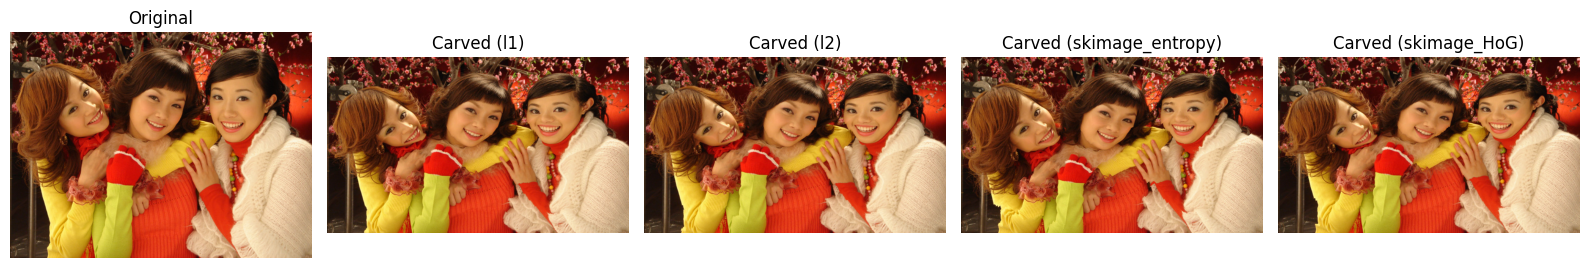

In [5]:
# Compare seam carving results using different energy methods on house_image

energy_methods = ['l1', 'l2', 'skimage_entropy', 'skimage_HoG']
carved_images = []
num_seams = 100

for method in energy_methods:
    sc = SeamCarver(girls_image)
    carved_img = sc.seam_carve(num_seams, method=method, orientation=1)
    carved_images.append((method, carved_img))

plt.figure(figsize=(16, 8))
plt.subplot(1, len(energy_methods) + 1, 1)
plt.imshow(cv2.cvtColor(girls_image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

for idx, (method, img) in enumerate(carved_images, start=2):
    plt.subplot(1, len(energy_methods) + 1, idx)
    plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'Carved ({method})')
    plt.axis('off')

plt.tight_layout()
plt.show()